In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
pickle_in = open("Y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

In [3]:
X= X/255.0
y = np.array(y)

In [4]:
print(X.shape[1:])

(150, 150, 3)


In [5]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation="relu", input_shape=X.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 331776)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      21,233,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,831,301 (83.28 MB)

 Trainable params: 21,831,301 (83.28 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.9026 - loss: 0.3478 - val_accuracy: 0.7814 - val_loss: 0.5784
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9588 - loss: 0.2198 - val_accuracy: 0.7541 - val_loss: 0.6282
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9532 - loss: 0.1790 - val_accuracy: 0.8033 - val_loss: 0.5471
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9703 - loss: 0.1435 - val_accuracy: 0.7322 - val_loss: 0.6596
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.9679 - loss: 0.1529 - val_accuracy: 0.8142 - val_loss: 0.5518
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9815 - loss: 0.1100 - val_accuracy: 0.7158 - val_loss: 0.6872
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.9787 - loss: 0.1171 - val_accuracy: 0.8142 - val_loss: 0.5489
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9944 - loss: 0.0717 - val_accuracy: 0.

In [10]:
model.save('64x3-CNN.keras')

In [12]:
CATEGORIES = ["BLACKSPOT", "CANKER", "GREENING", "HEALTHY", "MELANOSE"]
def prepare(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)


model = tf.keras.models.load_model("64x3-CNN.keras")

prediction = model.predict([prepare('leaves_healthy.png')])
print(prediction)
print(CATEGORIES[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0. 0. 0. 1. 0.]]
HEALTHY


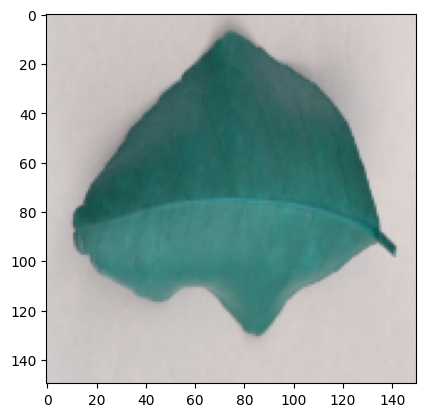

In [14]:
plt.imshow(prepare('leaves_healthy.png').reshape(150, 150, 3))
plt.show()

In [15]:
prediction = model.predict([prepare('leaves_canker.png')])
print(prediction)
print(CATEGORIES[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0. 1. 0. 0. 0.]]
CANKER


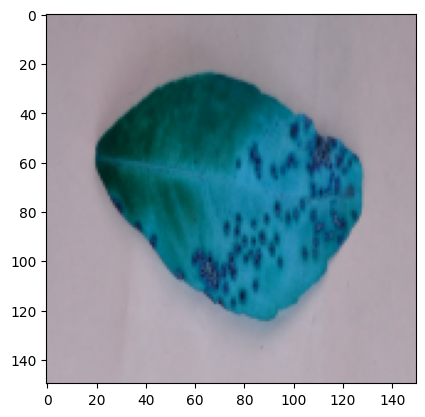

In [16]:
plt.imshow(prepare('leaves_canker.png').reshape(150, 150, 3))
plt.show()